# Hackathon 1: simulations, descriptive stats & estimation

This project illustrates the course LEPL1109 with an industrial applications of simulations. You will analyse the performance of an assembly chain, analytically and with simulations. This is an introduction to supply chain management which is a field actively studied by engineers (see e.g. LINMA2470 Stochastic modelling). 

## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Eliott Van Dieren 09731900

Part. 2: Cédric Ponsard 10721900

Part. 3: Romain Van Hauwaert 45081900

Part. 4: Baptiste Sambon 09781900

Part. 5: Maxime Vanliefde 16991900

Part. 6: Simon Delvaux 54091900

In a manufacture of mechanical devices for the automotive industry, the production of a gearbox is done by a line of 3 successive working stations. The production of a new gearbox starts only when the previous one is fully assembled. In what follows, the assembly time of one gearbox is denoted by $T$. Also, $T_k$ is the assembly time at machine $k$. Finally $\mu_k = \mathbb{E}(T_k)$ and $\sigma^2_k = \mathbb{V}(T)$. Details about the production line are provided in the graph below.

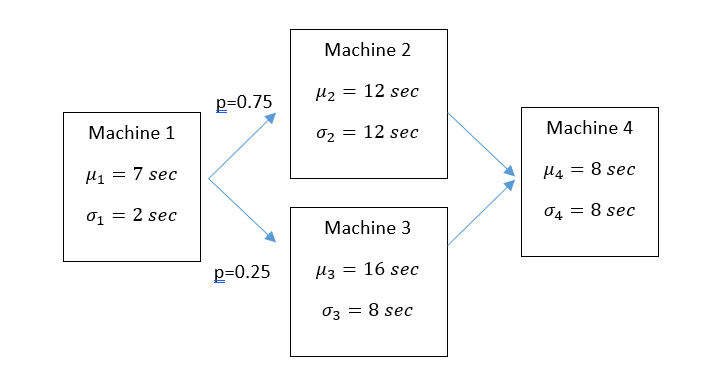

where $p=0.75$ indicates for example that the output of machine 1 ends up in machine 2 with probability $0.75$. 

------------------------------------------------------------------------------------------------------

1.	For each machine $k$, choose a (non-Gaussian) statistical distribution for the assembly time $T_k$ and provide value(s) for its parameter(s).

------------------------------------------------------------------------------------------------------

On sait déjà que les durées d'utilisation doivent être positives. On peut penser aux fonctions gamma (2 df) ainsi qu'aux exponentielles (1 df). Les machines 1 et 3 peuvent donc être décrites par des fonctions gamma et les machines 2 et 4, dont l'espérance et la variance sont égales, peuvent être modélisées par des exponentielles.

$\alpha_k \beta_k = \mathbb{E}(T_k)$ et $\alpha_k \beta_k^2 = \mathbb{V}(T_k)$

distrib function of exp = $\frac{1}{\beta}e^{-\frac{x}{\beta}}$

distrib function of gamma = 

* $T_1$ ~ $\Gamma(\frac{49}{4},\frac{4}{7})$
* $T_2$ ~ $expo(12)$
* $T_3$ ~ $\Gamma(4,4)$
* $T_4$ ~ $expo(8)$

------------------------------------------------------------------------------------------------------------------------

b) Calculate the expected time for assembling one gearbox, $\mathbb{E}(T)$.

------------------------------------------------------------------------------------------------------------------------

Nous pouvons observer par linéarité que $\mathbb{E}(T)$ = $\mathbb{E}(T_1) + 0.75\mathbb{E}(T_2) + 0.25\mathbb{E}(T_3) + \mathbb{E}(T_4) = 7+0.75*12 + 0.25*16+8 = 28s$

------------------------------------------------------------------------------------------------------

2. Simulate 5000 durations  $T$  for assembling one single gearbox and report the mean (check that its is well close to the expectation of question 1), standard deviation, 5% and 95% percentile. Plot an histogram. Save the simulated durations in a file "sample.csv".

------------------------------------------------------------------------------------------------------

In [54]:
import scipy.stats as sc
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [55]:
T = np.zeros(5000)

M1a = 49/4
M1scale = 4/7
M2scale = 12
M3a = 4
M3scale = 4
M4scale = 8

for i in range(5000):
    second_m = random.choices([0,1], weights=[0.25,0.75])[0] # 1 if 2nd machine, 0 otherwise 
    T[i] = sc.gamma.rvs(a = M1a,scale = M1scale,size=1) \
           + second_m*sc.expon.rvs(scale=M2scale) \
           + (1-second_m)*sc.gamma.rvs(a = M3a,scale = M3scale,size=1) \
           + sc.expon.rvs(scale=M4scale)

fifthPercentile_T = np.quantile(T,q=0.05)
nightyfifthPercentile_T = np.quantile(T,q=0.95)
std_T = np.std(T)

print("mean_T = {}".format(np.mean(T)))
print("fifthPercentile_T = {}".format(fifthPercentile_T))
print("nightyfifthPercentile_T = {}".format(nightyfifthPercentile_T))
print("std_T = {}".format(std_T))

np.savetxt("sample.csv", T, delimiter=",")

mean_T = 28.143977274010144
fifthPercentile_T = 10.61102592744667
nightyfifthPercentile_T = 55.07067698265955
std_T = 14.264254857399344


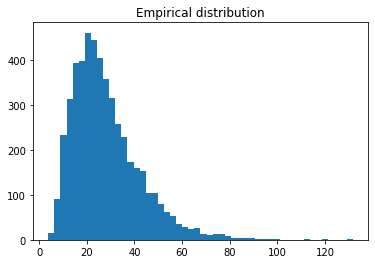

In [56]:
# plot
plt.hist(T,bins=50);
plt.title("Empirical distribution")
plt.show()


------------------------------------------------------------------------------------------------------


3. a) Load simulated data from the file "sample.csv". Fit the exponential, gamma and chi-square distributions and estimate their parameters by log-likelihood maximization. Select the best non-Gaussian statistical distribution for  $T$. Justify your choice.

Rem: if you use scipy, set the location parameter to zero with option 'floc=0'.

------------------------------------------------------------------------------------------------------

Les distributions gamma et chi² sont identiques, ce qui est attendu vu que la chi² est un cas particulier de la gamma. Les paramètres d'échelle permettent d'égaler les deux.  
Nous écartons la distribution exponentielle, qui ne semble pas estimer correctement les données, et choisissons la distribution gamma. 

[]

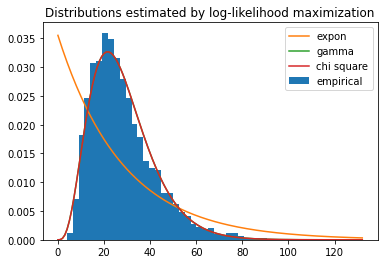

In [57]:
data = pd.read_csv("sample.csv").to_numpy()
x = np.arange(0,np.max(data)+1)

[_, expon_scale] = sc.expon.fit(data,floc=0)
[gamma_alpha,_,gamma_beta] = sc.gamma.fit(data,floc=0)
[chi2_alpha,_,chi2_beta] = sc.chi2.fit(data,floc=0)

expon_pdf = sc.expon.pdf(x,loc=0,scale=expon_scale)
gamma_pdf = sc.gamma.pdf(x, gamma_alpha, loc=0, scale=gamma_beta)
chi2_pdf = sc.chi2.pdf(x,chi2_alpha, loc=0, scale=chi2_beta)

plt.hist(data,bins=50,density=True, label="empirical")
plt.plot(expon_pdf,label="expon")
plt.plot(gamma_pdf, label="gamma")
plt.plot(chi2_pdf, label="chi square")
plt.legend()
plt.title("Distributions estimated by log-likelihood maximization")
plt.plot()

b) During the lectures, we have seen that the chi-square distribution has only one single parameter (the number of degrees of freedom). In Scipy, we find two other parameters location "loc" and scale "scale". Why? 

Ces paramètres permettent de décaler et/ou mettre à l'échelle la distribution standardisée.  
On a que `chi2.pdf(x, df, loc, scale)` est équivalent à `chi2.pdf(y, df) / scale` avec `y = (x - loc) / scale`.


------------------------------------------------------------------------------------------------------

c) Compare the empirical distribution with the distribution you chose at 3a). For this purpose, plot an histogram of  durations and add the probability density function (pdf) that you have selected for modelling the random variable.

------------------------------------------------------------------------------------------------------

[]

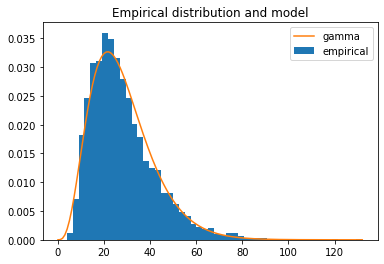

In [58]:
plt.hist(data,bins=50,density=True, label="empirical")
plt.plot(gamma_pdf, label="gamma") # ou chi square?
plt.legend()
plt.title("Empirical distribution and model")
plt.plot()

------------------------------------------------------------------------------------------------------

4. We want to fit a Weibull distribution to $T$. The density, $f(t)$, depends upon two parameters $\alpha>0$ and $\lambda>0$ and is given by:

$$ f(t)=\lambda \alpha t^{\alpha-1} \exp(-\lambda t^\alpha) $$

a) Write two functions: one for the density and one that computes the log-likelihood of a sample of durations for this distribution. Test this function on the simulated dataset and for $\alpha=1$ and $\lambda=\frac{1}{28}$

------------------------------------------------------------------------------------------------------

In [59]:
Weibull_pdf = lambda t, a, l : l*a*np.power(t,a-1)*np.exp(-l*np.power(t,a))

def log_likelihood_Weibull(alf,lmbd,data):
    y =  np.log(Weibull_pdf(data,alf,lmbd))
    return float(np.sum(y))

print("log likelihood de Weibull : ",log_likelihood_Weibull(1,1/28,data))

log likelihood de Weibull :  -21682.665821888237


------------------------------------------------------------------------------------------------------

b) Maximize the log-likelihood to find estimates $\hat{\alpha}$ and $\hat{\lambda}$. Next compare the log-likelihood with those computed previously. Is this model better?

Hint: use the "scipy.optimize" package and the function "minimize". To avoid adding constraints, you can do a change of variables: $\alpha=\exp(a)$ and $\lambda=\exp(b)$. The function "minimize" may send back a warning (division by zero in log) but converges well to the solution.

------------------------------------------------------------------------------------------------------

alfa =  2.097622397802986
lambda =  0.0007010327486980414


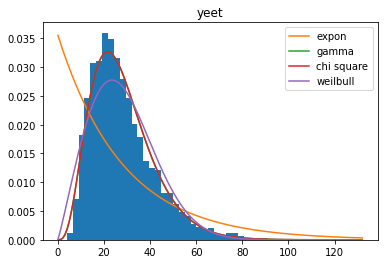

In [61]:
from scipy import optimize

def opti_weibull(yeet,data):
    a,b = yeet
    ea,eb= np.exp(yeet)
    y = np.log(data)*(ea-1)-eb*np.power(data,ea)+ a + b
    return -float(np.sum(y))

ab0 = np.log([1,1/28])

alfa_weilbull, lambda_weilbull = np.exp(optimize.minimize(opti_weibull,ab0,data).x)

print("alfa = ",alfa_weilbull)
print("lambda = ",lambda_weilbull)

weilbull_pdf = Weibull_pdf(x,alfa_weilbull,lambda_weilbull)
plt.hist(data,bins=50,density=True)
plt.plot(expon_pdf,label="expon")
plt.plot(gamma_pdf, label="gamma")
plt.plot(chi2_pdf, label="chi square")
plt.plot(weilbull_pdf, label="weilbull")
plt.legend()
plt.title("yeet")
plt.show()

------------------------------------------------------------------------------------------------------

c) The expectation and variance of the Weibull distribution are 
$$ \mathbb{E}(T)=\lambda^{-\frac{1}{\alpha}}\Gamma(\frac{1}{\alpha}+1) $$

$$ \mathbb{V}(T)=\lambda^{-\frac{2}{\alpha}} \left(  \Gamma(\frac{2}{\alpha}+1) -\Gamma(\frac{1}{\alpha}+1)^2  \right) $$

Estimate $\alpha$  and $\lambda$ by the methods of moments. Next calculate the log-likelihood with these estimates and compare with these obtained by log-likelihood maximization. Is the result surprising ?

Hint: use the scipy.optimize package and the function "root". The gamma function is scipy.special.gamma(z)

------------------------------------------------------------------------------------------------------

C:\Users\maxim\AppData\Local\Temp/ipykernel_456/1110671094.py:1: RuntimeWarning: divide by zero encountered in power
  Weibull_pdf = lambda t, a, l : l*a*np.power(t,a-1)*np.exp(-l*np.power(t,a))
C:\Users\maxim\AppData\Local\Temp/ipykernel_456/1110671094.py:1: RuntimeWarning: invalid value encountered in multiply
  Weibull_pdf = lambda t, a, l : l*a*np.power(t,a-1)*np.exp(-l*np.power(t,a))


alpha =  1.0
lambda =  0.03571428571428571


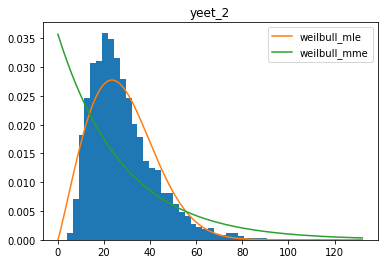

In [62]:
from scipy import special

def method_of_moments(y) :
    [a, l] = y
    x = np.arange(0,np.max(data)+1)
    esperance = np.dot(x, Weibull_pdf(x, a, l))
    variance = np.dot(x**(2), Weibull_pdf(x, a, l)) - esperance**2
    mu = l**(-1/a)*special.gamma((1/a) + 1)
    var = l**(-2/a)*(special.gamma((1/a) + 1) - (special.gamma((1/a) + 1))**2)
    return [esperance - mu, variance - var]

x0 = np.array([1,1/28])
[alpha_mme, lambda_mme] = optimize.root(method_of_moments, x0).x
print("alpha = ",alpha_mme)
print("lambda = ",lambda_mme)

weilbull_pdf_mme = Weibull_pdf(x,alpha_mme,lambda_mme)
plt.hist(data,bins=50,density=True)
plt.plot(weilbull_pdf, label="weilbull_mle")
plt.plot(weilbull_pdf_mme, label="weilbull_mme")
plt.legend()
plt.title("yeet_2")
plt.show()

------------------------------------------------------------------------------------------------------

5.	Based on the content of the “Self-learning 2”, Bootstrap 1000 times the sample of durations simulated in Question 2 (stored in the file "sample.csv") and compute, the mean, standard deviation and 95% and 90% confidence interval for parameter(s) estimate(s). Plot the empirical distribution of parameter(s).

------------------------------------------------------------------------------------------------------

In [ ]:
#code here


-----------------------------------------------------------------------------------------------------

6. Using simulated assembling times, determine the probability that assembling 10 gearboxes lasts less than 320 seconds $P(T\leq 320\,sec)$. 

------------------------------------------------------------------------------------------------------

In [ ]:
#code here


------------------------------------------------------------------------------------------------------

7. Is there any alternative to numerical computing in question 6 for approximating  $P(T\leq 320\,sec)$? Please detail your answer and provide an estimate of this probability.

------------------------------------------------------------------------------------------------------

Answer here
